In [20]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [21]:
# Reading the csv file
csv_path = "../Data/2007-2023-PIT-Counts-by-State.csv"
df = pd.read_csv(csv_path)
df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
3,AS,0.0,,,,,,,,,...,,,,,,,,,,
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0


In [22]:
# Dropping all rows that have data from non-states
df = df[df['State'] != 'DC']
df = df[df['State'] != 'GU']
df = df[df['State'] != 'PR']
df = df[df['State'] != 'MP']
df = df[df['State'] != 'VI']

# Dropping State "AS" because it has no recorded data
df = df[df['State'] != 'AS']

# Dropping the rows that have states in the non-states list
df = df[df['State'] != 'Total']

# Dropping the final row because all the data is "NaN"
df.dropna(inplace=True)

df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0
5,CA,44.0,"57,468","12,424","4,288","39,950","25,230","31,319",338,126,...,745,373,254,627,118,963,497,295,792,171


In [23]:
# Checking the count of the states column
df['State'].count()

50

In [24]:
df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0
5,CA,44.0,"57,468","12,424","4,288","39,950","25,230","31,319",338,126,...,745,373,254,627,118,963,497,295,792,171


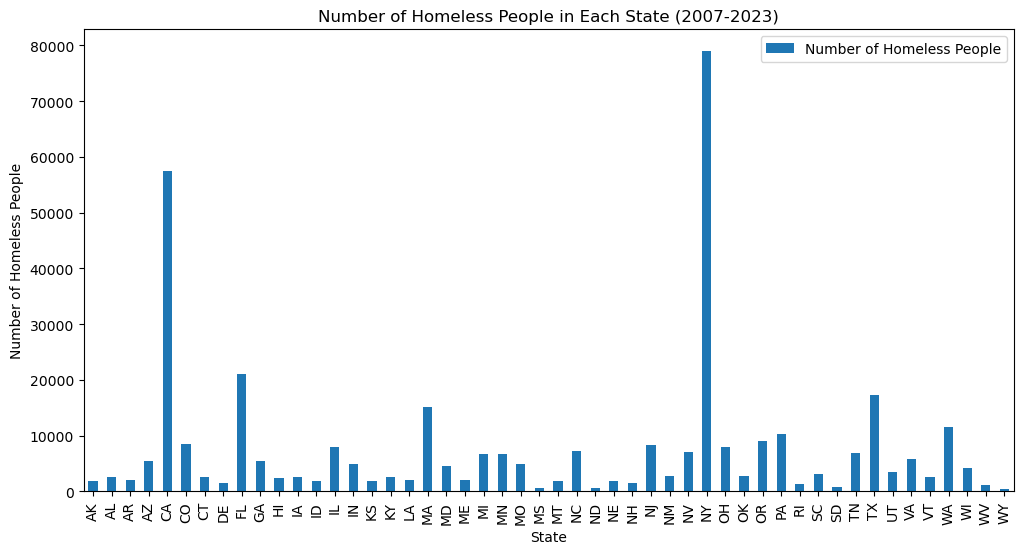

In [25]:
# Removing commas from values
df['Overall Homeless'] = df['Overall Homeless'].str.replace(",", "")
overall_homeless_df = pd.DataFrame({'Number of Homeless People': df['Overall Homeless'].values.astype(int)},
    index=df['State']
)

homeless_plot = overall_homeless_df.plot(kind='bar', title='Number of Homeless People in Each State (2007-2023)',
                                         xlabel='State', ylabel='Number of Homeless People', figsize=(12, 6));
fig = homeless_plot.get_figure()
fig.savefig('Visualizations/US_homeless_per_state.png')
fig.savefig('../Images/Homelessness_and_Unemployment/US_homeless_per_state.png')

In [26]:
overall_homeless_df.sort_values('Number of Homeless People')

,Number of Homeless People
State,
WY,405
ND,548
MS,626
SD,817
WV,1138
RI,1267
NH,1491
DE,1579
MT,1801


In [27]:
# Getting the total number of homeless people
overall_homeless_df['Number of Homeless People'].sum()

374702